In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date
from matplotlib.dates import DateFormatter

In [2]:
# selecting a stock 
stock_name = input()

GOOGL


In [3]:
#downloading the data
stock_df = yf.download(stock_name,start ="2012-10-22",end = date.today().strftime("%Y-%m-%d"),interval='1d')

[*********************100%***********************]  1 of 1 completed


In [4]:
stock_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-04-12,2632.000000,2632.000000,2535.780029,2554.290039,2554.290039,1635500
2022-04-13,2560.000000,2606.679932,2554.820068,2597.879883,2597.879883,1396400
2022-04-14,2609.590088,2609.590088,2532.020020,2534.600098,2534.600098,1576500
2022-04-18,2540.000000,2564.250000,2523.639893,2553.530029,2553.530029,1040400
2022-04-19,2553.830078,2606.659912,2539.989990,2600.179932,2600.179932,1320200


In [5]:
#Converting the last 7 column to list
last_7day_closing = stock_df['Adj Close'].values.tolist()
Last_7day_closing = last_7day_closing[-8:-1]
Last_7day_closing

[2717.77001953125,
 2665.75,
 2576.469970703125,
 2554.2900390625,
 2597.8798828125,
 2534.60009765625,
 2553.530029296875]

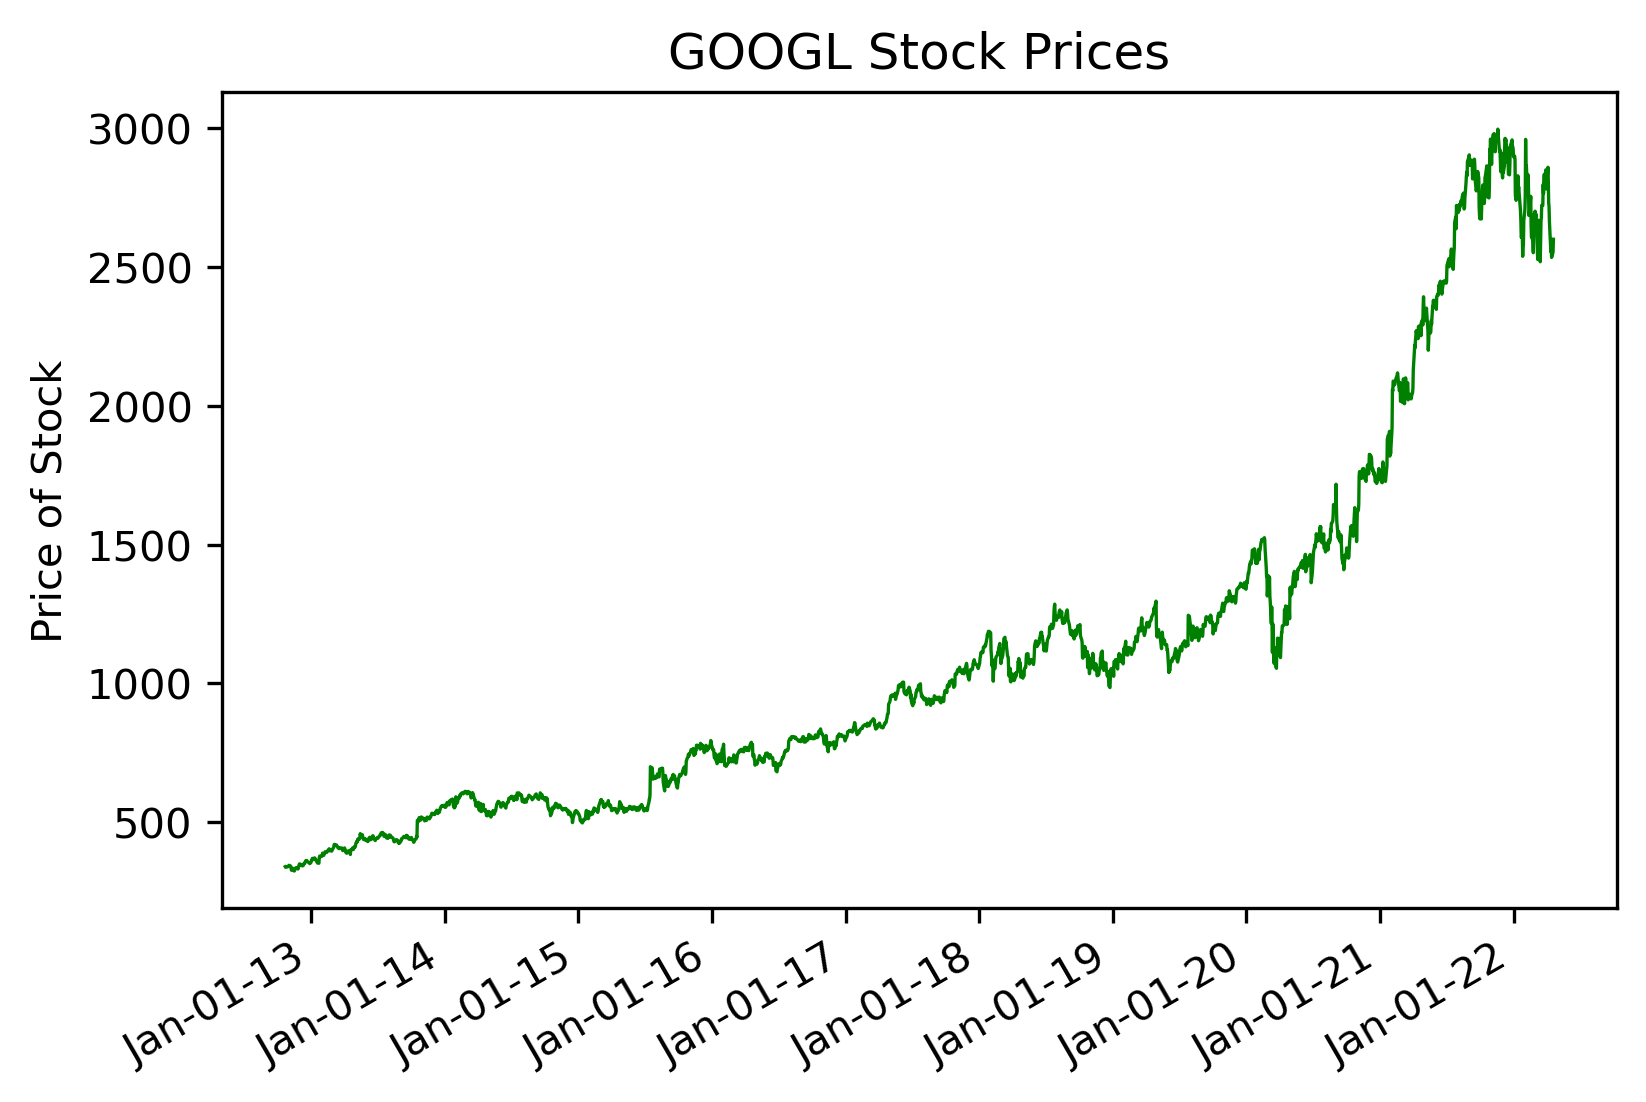

In [6]:
fig, ax = plt.subplots(dpi=300)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

ax.plot(stock_df['Close'], lw=0.8,color="g")

# Adding labels and title to the plot
ax.set_ylabel('Price of Stock')
ax.set_title(stock_name +' Stock Prices')

plt.show()

In [7]:
# Compute a 30-day Simple Moving Average
stock_df['SMA_10'] = stock_df['Close'].rolling(window=10, min_periods=1).mean()
# Compute a 90-day Simple Moving Average
stock_df['SMA_30'] = stock_df['Close'].rolling(window=30, min_periods=1).mean()
stock_df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30
Date,,,,,,,,
2012-10-22,340.845856,342.657654,335.185181,339.674683,339.674683,8103089,339.674683,339.674683
2012-10-23,336.341339,344.009003,336.336334,340.515503,340.515503,5827367,340.095093,340.095093
2012-10-24,343.743744,343.843842,337.972961,338.988983,338.988983,4988007,339.726390,339.726390
2012-10-25,340.340332,341.341339,337.092102,339.219208,339.219208,4797398,339.599594,339.599594
2012-10-26,338.588593,341.856842,335.935944,337.912903,337.912903,3897698,339.262256,339.262256


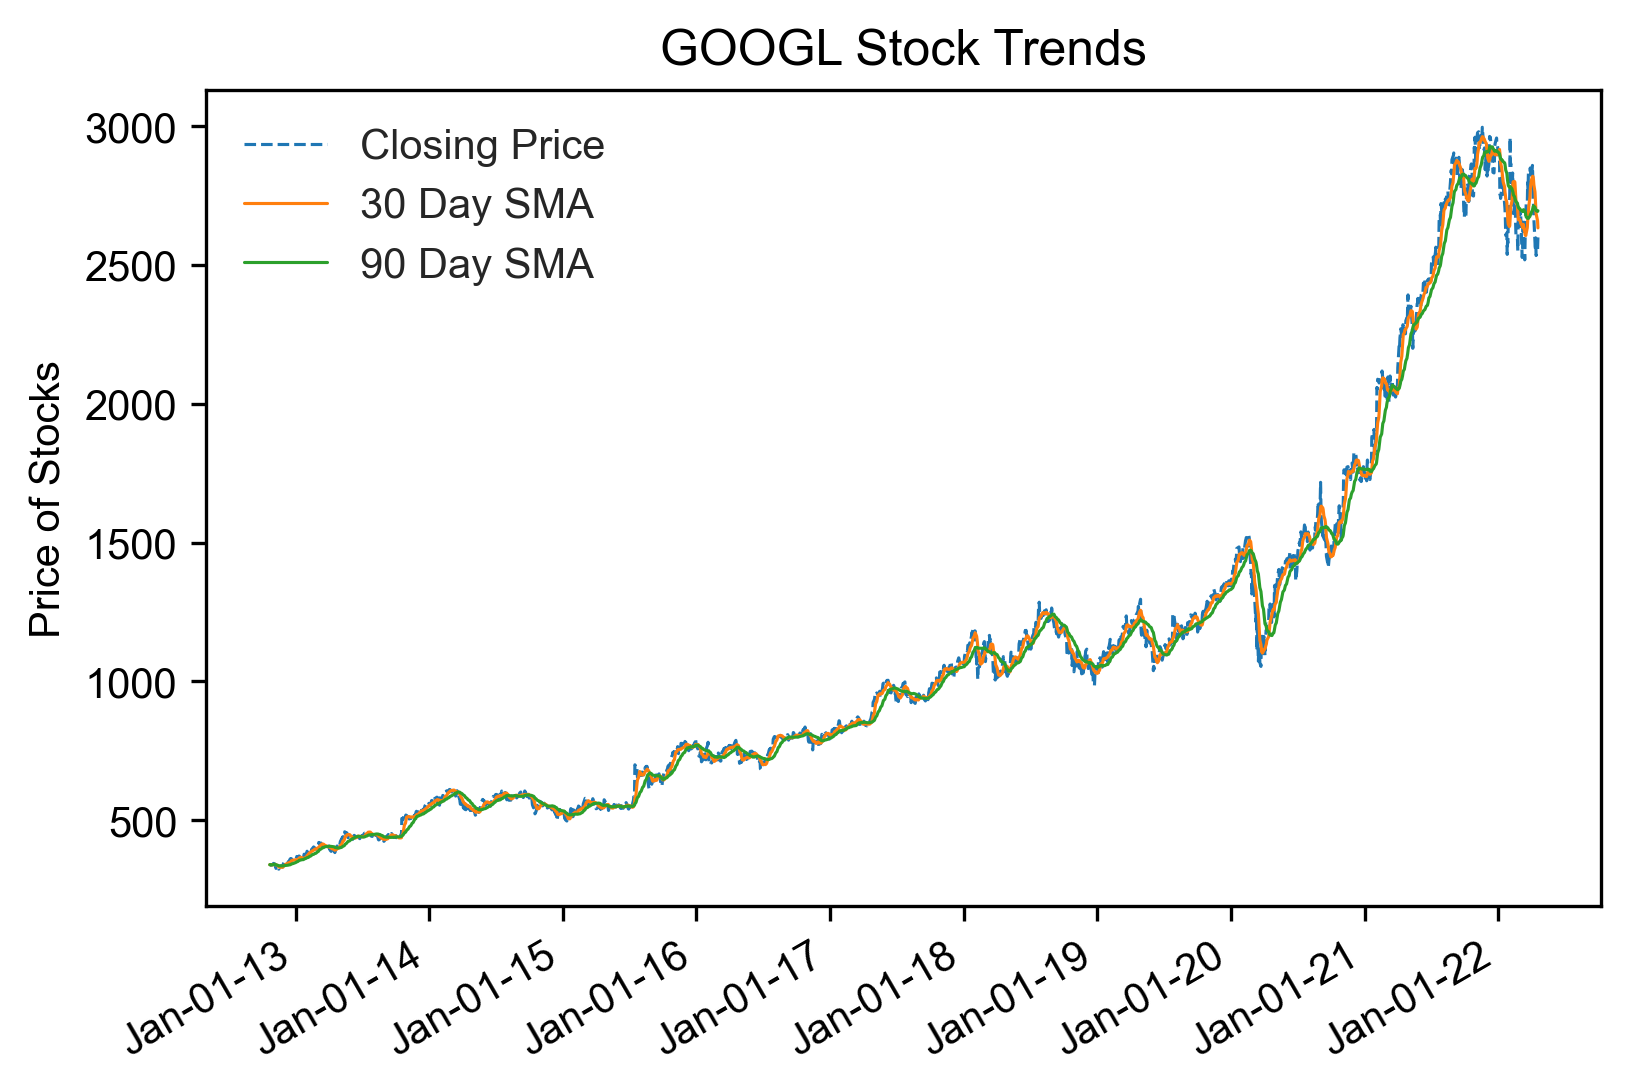

In [8]:
fig, ax = plt.subplots(dpi=300)
plt.style.use("seaborn")

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

ax.plot(stock_df['Adj Close'], lw=0.75,ls='--', label='Closing Price') 


ax.plot(stock_df['SMA_10'], lw=0.75,label='30 Day SMA')
ax.plot(stock_df['SMA_30'], lw=0.75,label='90 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Stocks')
ax.set_title(stock_name + ' Stock Trends')
 
ax.legend()

plt.show()

In [9]:
#Creating a new dataframe
trade_signals = pd.DataFrame(index=stock_df.index)

trade_signals['Short'] = stock_df['Close'].rolling(window=10, min_periods=1).mean()
trade_signals['Long'] = stock_df['Close'].rolling(window=30, min_periods=1).mean()

trade_signals

,Short,Long
Date,,
2012-10-22,339.674683,339.674683
2012-10-23,340.095093,340.095093
2012-10-24,339.726390,339.726390
2012-10-25,339.599594,339.599594
2012-10-26,339.262256,339.262256
...,...,...
2022-04-12,2733.962012,2704.271012
2022-04-13,2709.872998,2701.152677
2022-04-14,2685.197998,2696.373014


In [10]:
# Create a new column populated with zero's
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   
trade_signals

,Short,Long,Signal
Date,,,
2012-10-22,339.674683,339.674683,0.0
2012-10-23,340.095093,340.095093,0.0
2012-10-24,339.726390,339.726390,0.0
2012-10-25,339.599594,339.599594,0.0
2012-10-26,339.262256,339.262256,0.0
...,...,...,...
2022-04-12,2733.962012,2704.271012,1.0
2022-04-13,2709.872998,2701.152677,1.0
2022-04-14,2685.197998,2696.373014,0.0


###### According to our Moving Average Crossover strategy, we want to buy when the short-term SMA crosses the long-term SMA from below, and sell when it crosses over from above. We can easily use the Signal column in the trade_signals dataframe to determine where exactly these events occur. If the Signal column has value 0.0 on a given date then switches to 1.0, this means the short-term SMA crossed the long-term SMA from below - this is our time to buy stock according to our strategy. On the other hand, if the value goes from 1.0 to 0.0, that tells us the short-term SMA was above the long-term SMA and then crossed over - this is our time to sell.

In [11]:
# creating a column where 1 represent to buy and -1 represent to sell
trade_signals["Order"]=trade_signals['Signal'].diff()
trade_signals

,Short,Long,Signal,Order
Date,,,,
2012-10-22,339.674683,339.674683,0.0,NaN
2012-10-23,340.095093,340.095093,0.0,0.0
2012-10-24,339.726390,339.726390,0.0,0.0
2012-10-25,339.599594,339.599594,0.0,0.0
2012-10-26,339.262256,339.262256,0.0,0.0
...,...,...,...,...
2022-04-12,2733.962012,2704.271012,1.0,0.0
2022-04-13,2709.872998,2701.152677,1.0,0.0
2022-04-14,2685.197998,2696.373014,0.0,-1.0


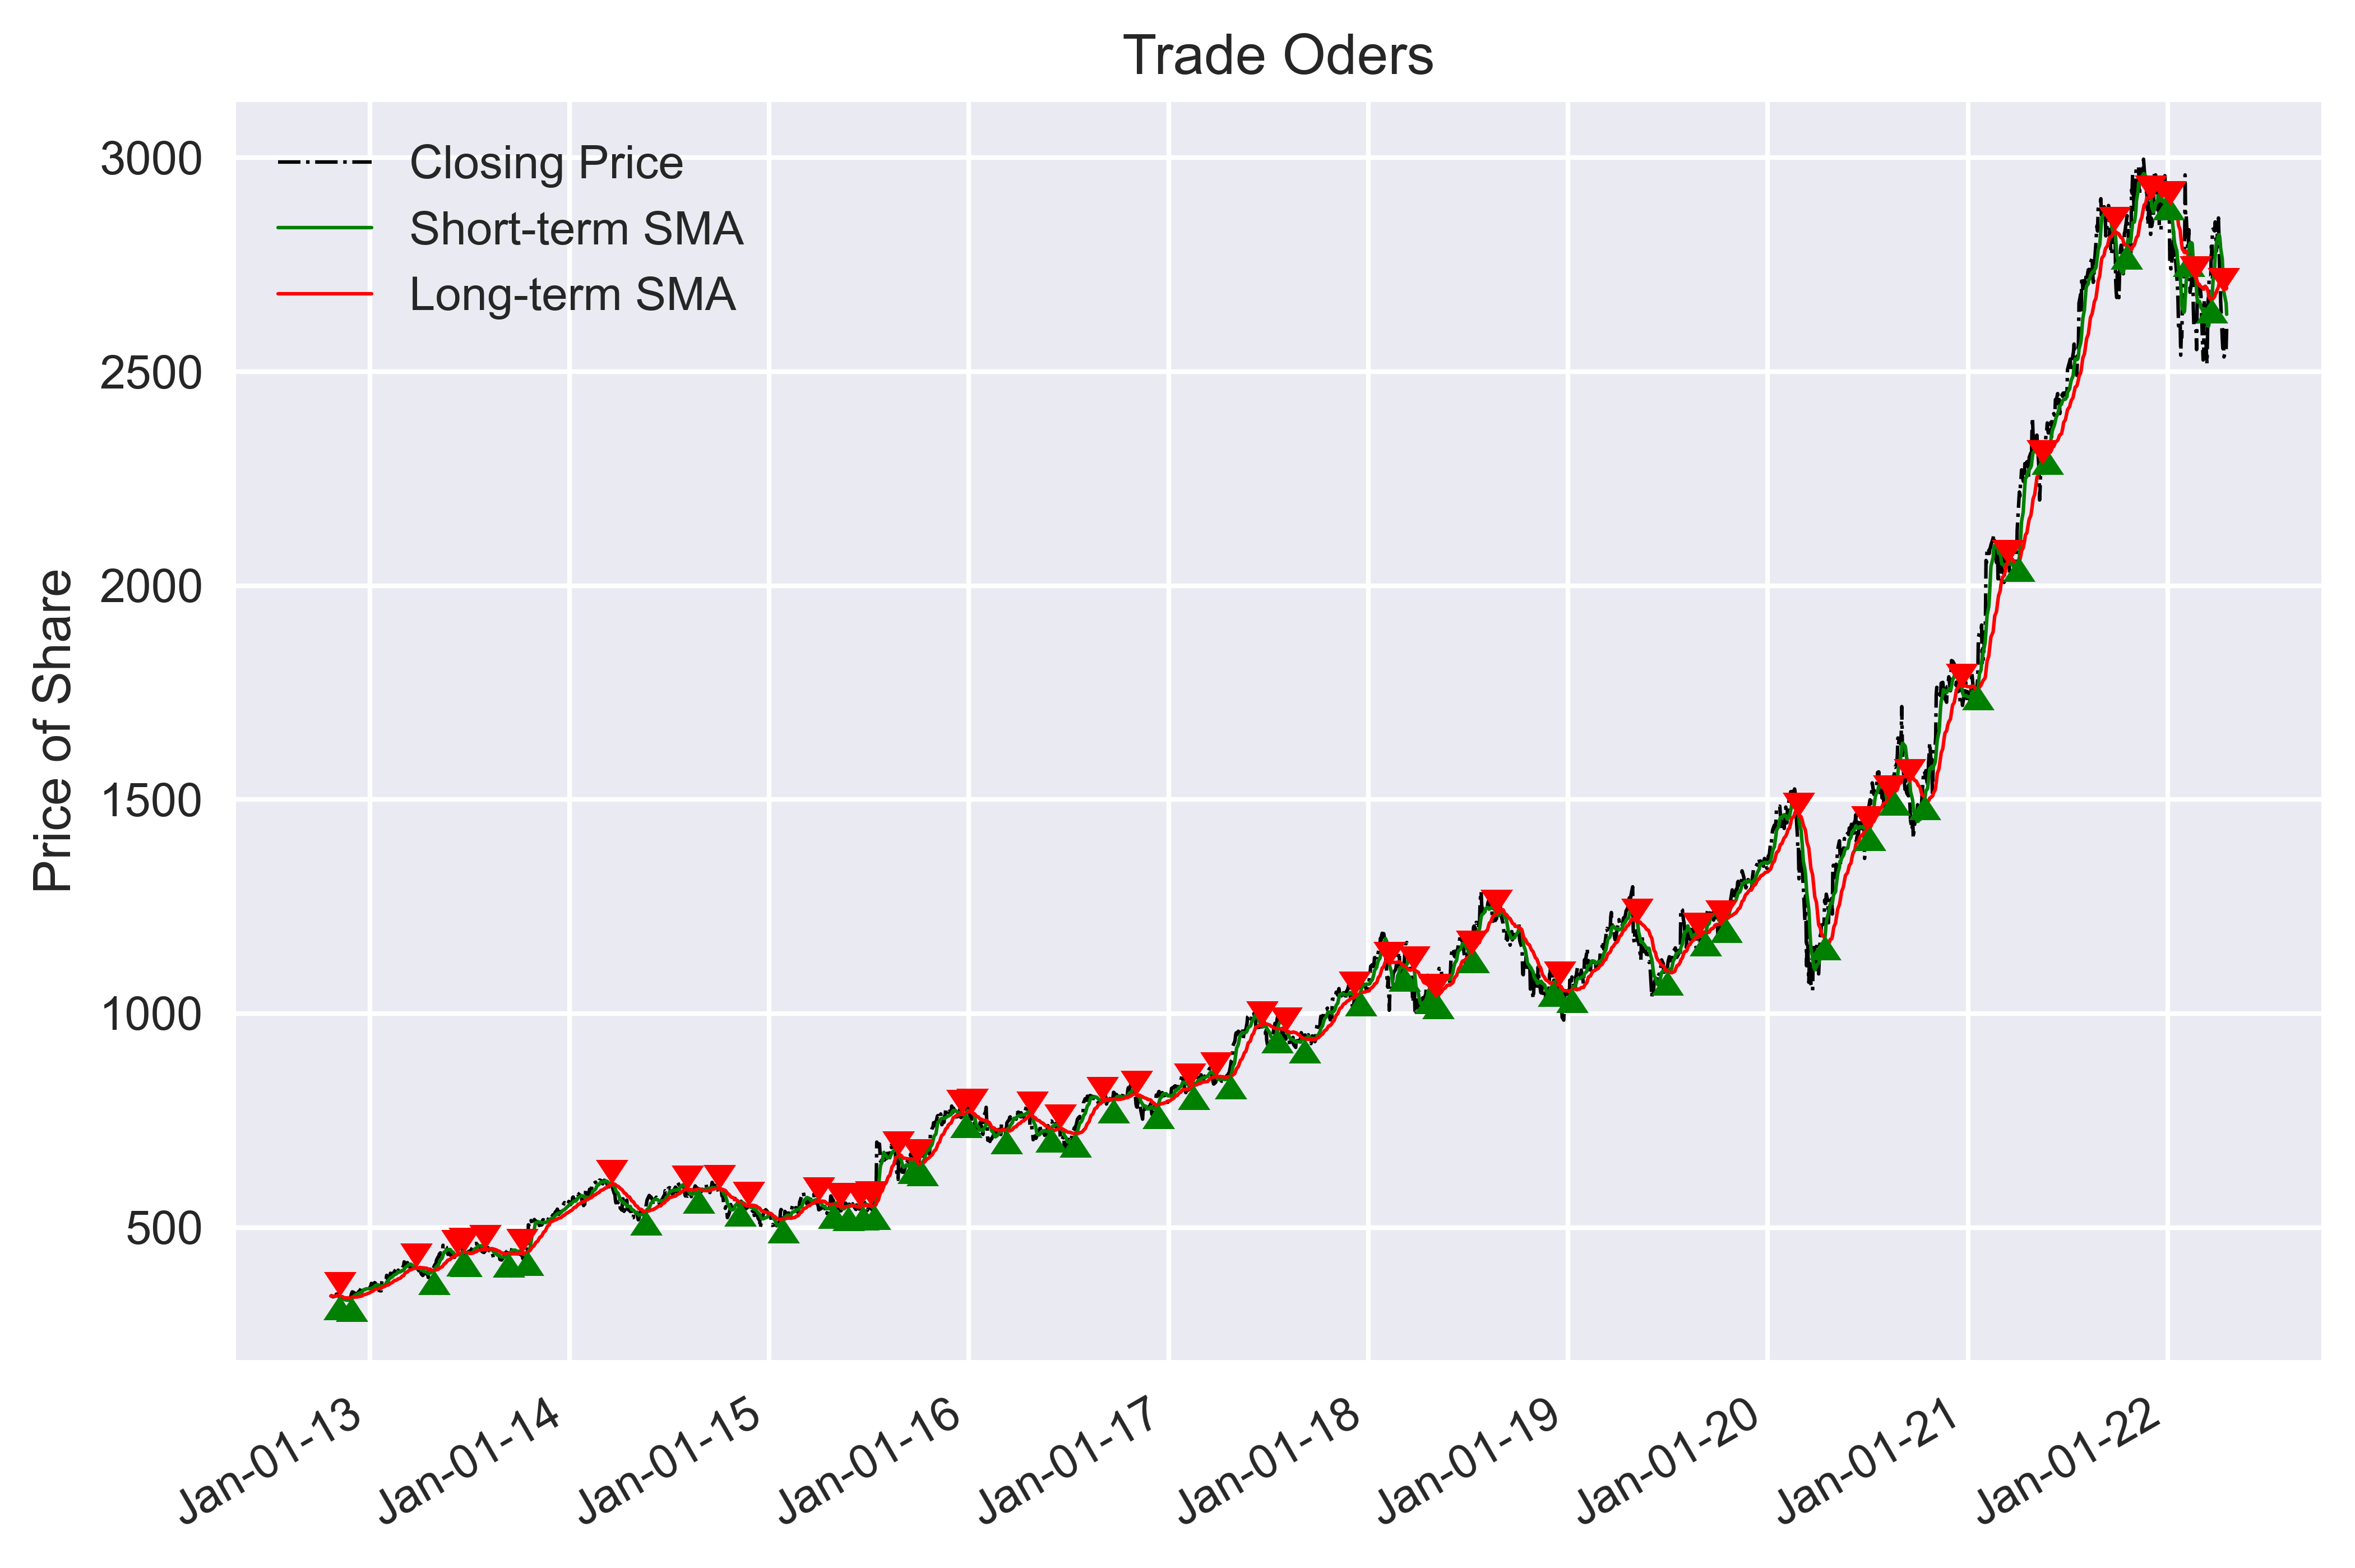

In [12]:
fig, ax = plt.subplots(dpi=600)
plt.style.use('seaborn')

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()


ax.plot(stock_df['Close'], lw=0.75,ls='-.',color='k', label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75,color="g", label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75,color="r", label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Order']==1.0].index, trade_signals.Short[trade_signals['Order'] == 1.0],
 marker=6, ms=7, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Order'] == -1.0].index, trade_signals.Short[trade_signals['Order'] == -1.0],
 marker=7, ms=7, linestyle='none',color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Share')
ax.set_title('Trade Oders')

ax.legend() 

plt.show()

In [13]:
#  money you will start with
initial_balance = 10000.0

# Create dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Adding column containing the daily percent returns
backtest['stock_return'] = stock_df['Close'] / stock_df['Close'].shift(1) # Current closing price / yesterday's closing price


In [14]:
# Adding column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.stock_return, 1.0)

# Adding column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product
backtest

,stock_return,Alg_Return,Balance
Date,,,
2012-10-22,NaN,1.000000,10000.000000
2012-10-23,1.002475,1.000000,10000.000000
2012-10-24,0.995517,1.000000,10000.000000
2012-10-25,1.000679,1.000000,10000.000000
2012-10-26,0.996149,1.000000,10000.000000
...,...,...,...
2022-04-12,0.991391,0.991391,39559.512925
2022-04-13,1.017065,1.017065,40234.609708
2022-04-14,0.975642,1.000000,40234.609708


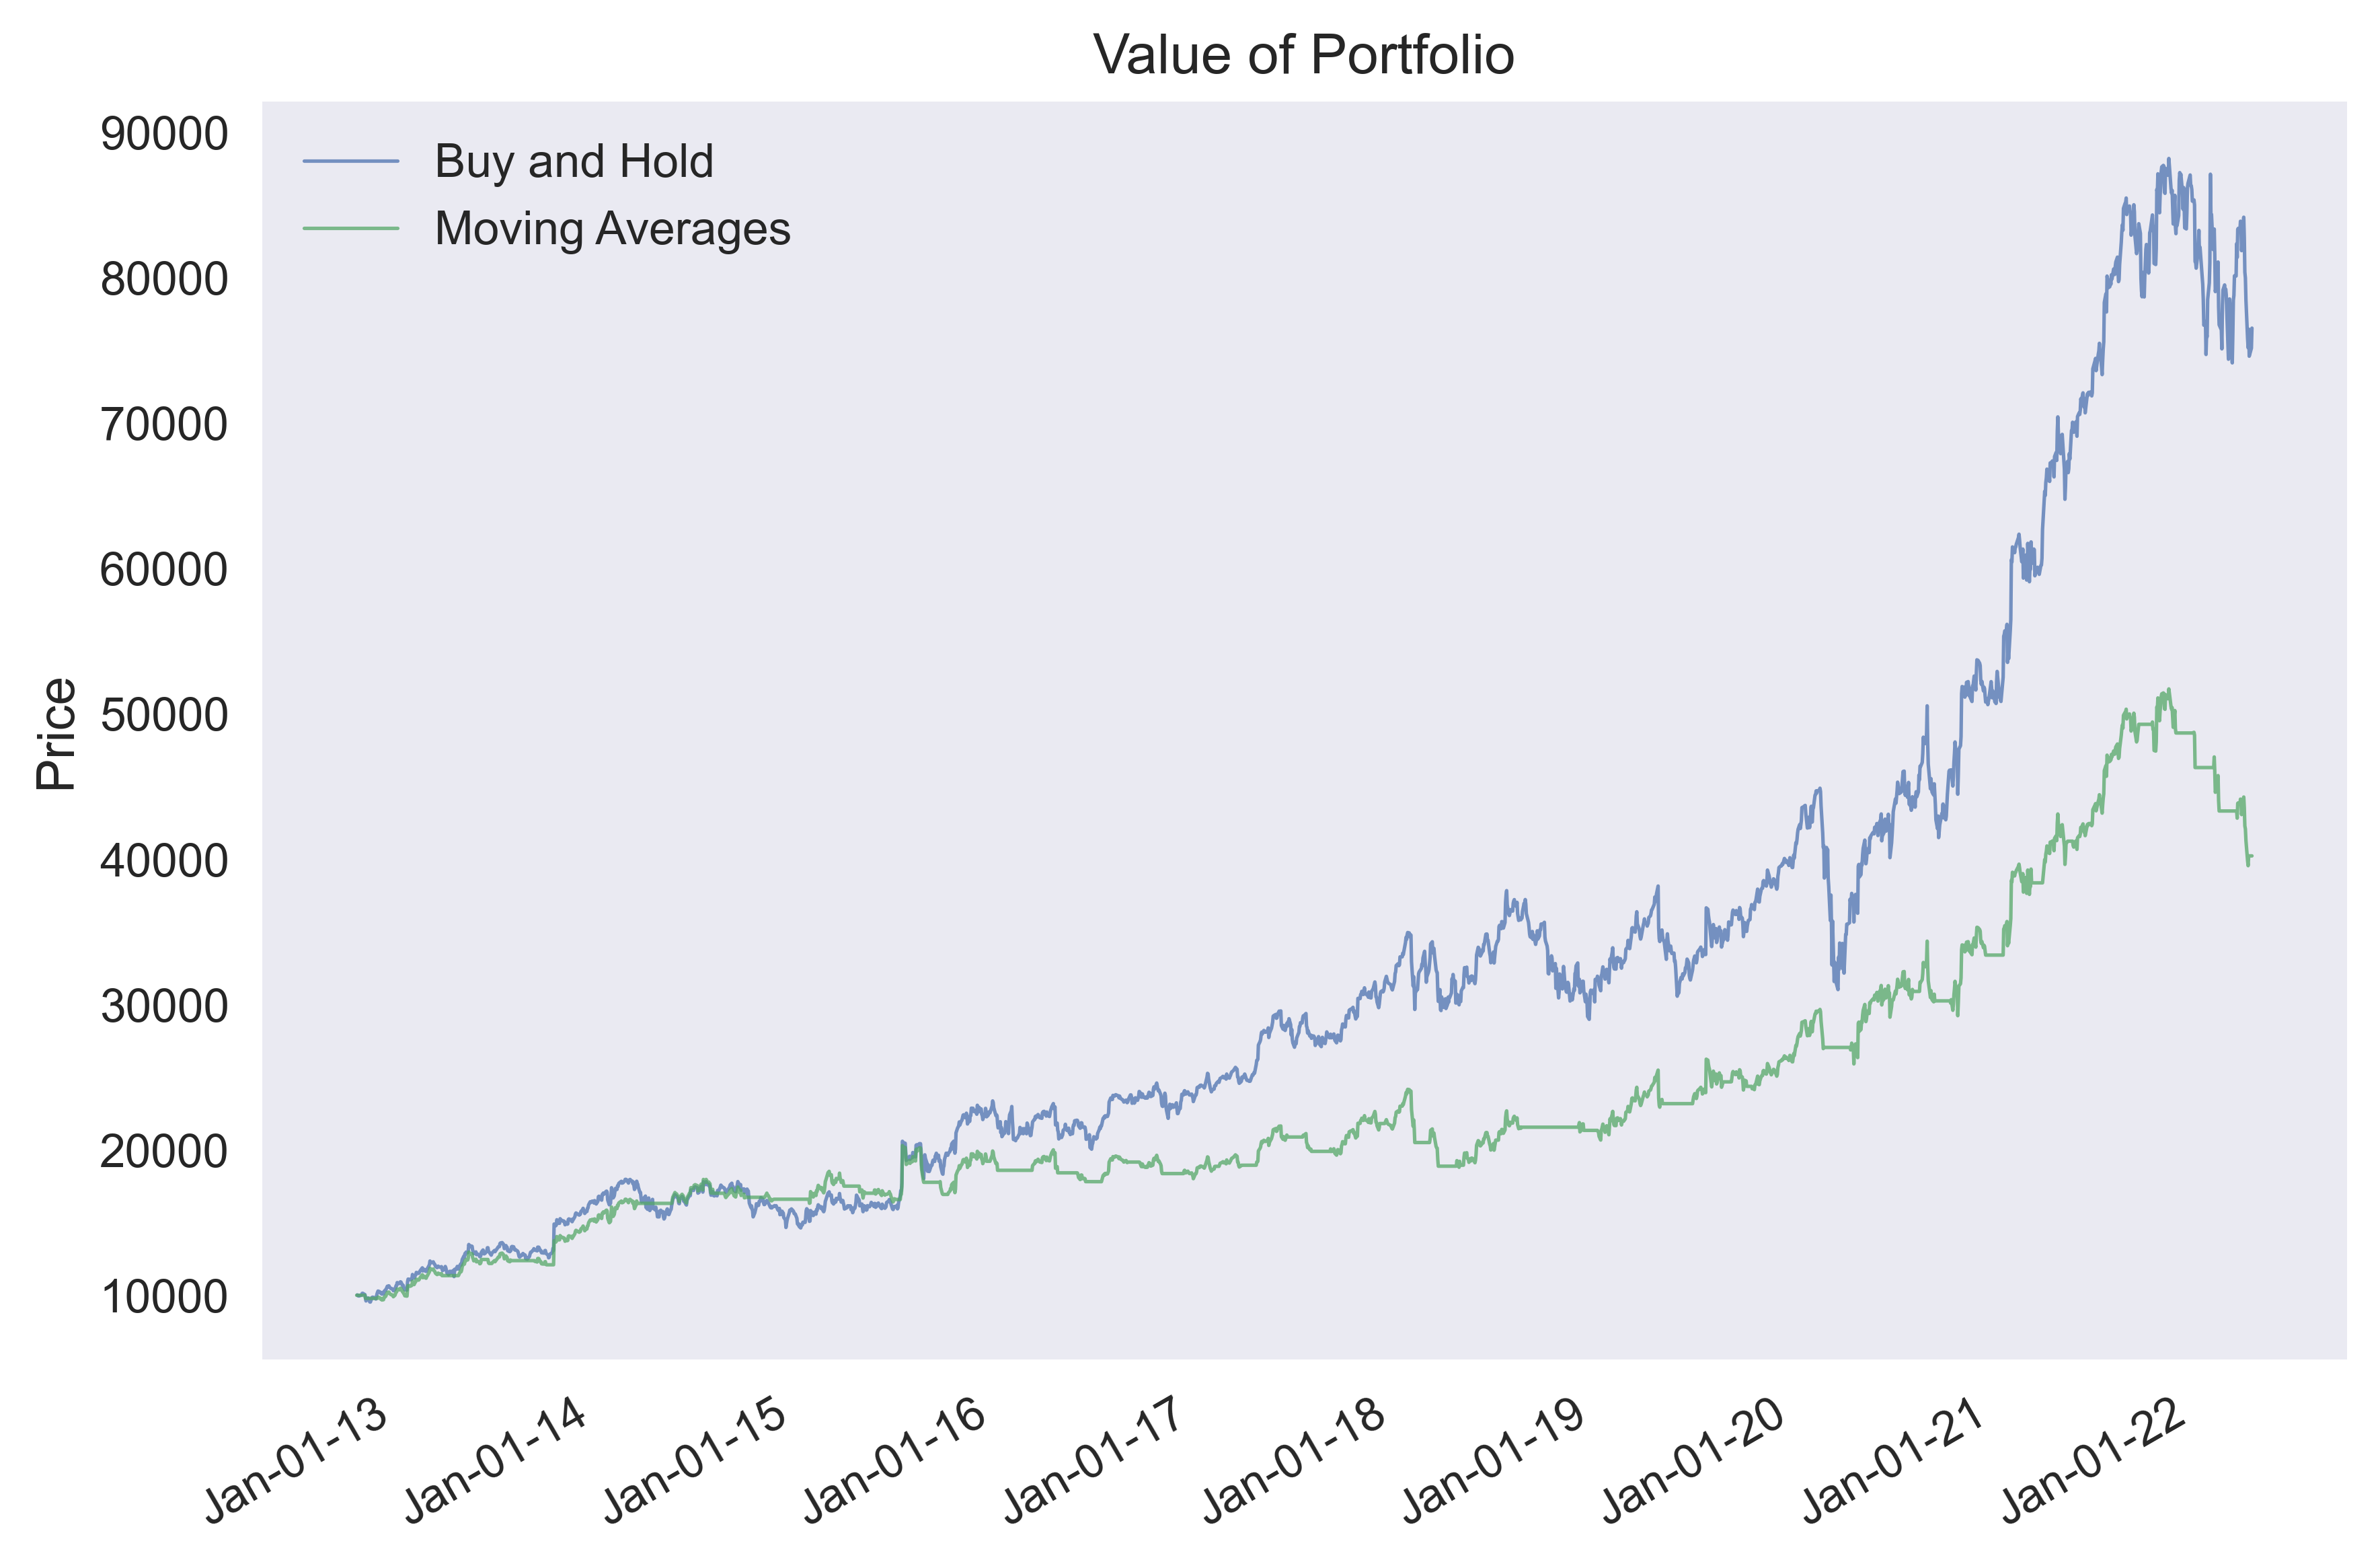

In [15]:
fig, ax = plt.subplots(dpi=500)
plt.style.use("seaborn")

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.stock_return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Moving Averages')

# Adding labels and title to the plot
ax.set_ylabel('Price')
ax.set_title('Value of Portfolio')
ax.grid() 
ax.legend() 


plt.show()

In [24]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [16]:
#working with exponential moving averages
ema_df = stock_df
ema_df

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30
Date,,,,,,,,
2012-10-22,340.845856,342.657654,335.185181,339.674683,339.674683,8103089,339.674683,339.674683
2012-10-23,336.341339,344.009003,336.336334,340.515503,340.515503,5827367,340.095093,340.095093
2012-10-24,343.743744,343.843842,337.972961,338.988983,338.988983,4988007,339.726390,339.726390
2012-10-25,340.340332,341.341339,337.092102,339.219208,339.219208,4797398,339.599594,339.599594
2012-10-26,338.588593,341.856842,335.935944,337.912903,337.912903,3897698,339.262256,339.262256
...,...,...,...,...,...,...,...,...
2022-04-12,2632.000000,2632.000000,2535.780029,2554.290039,2554.290039,1635500,2733.962012,2704.271012
2022-04-13,2560.000000,2606.679932,2554.820068,2597.879883,2597.879883,1396400,2709.872998,2701.152677
2022-04-14,2609.590088,2609.590088,2532.020020,2534.600098,2534.600098,1576500,2685.197998,2696.373014


In [17]:
# Compute a 10-day EMA
ema_df['EMA_10'] = ema_df['Close'].ewm(span=10,adjust = False).mean()
# Compute a 30-day EMA
ema_df['EMA_30'] = ema_df['Close'].ewm(span=30,adjust=False).mean()

ema_df

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,EMA_10,EMA_30
Date,,,,,,,,,,
2012-10-22,340.845856,342.657654,335.185181,339.674683,339.674683,8103089,339.674683,339.674683,339.674683,339.674683
2012-10-23,336.341339,344.009003,336.336334,340.515503,340.515503,5827367,340.095093,340.095093,339.827559,339.728929
2012-10-24,343.743744,343.843842,337.972961,338.988983,338.988983,4988007,339.726390,339.726390,339.675091,339.681191
2012-10-25,340.340332,341.341339,337.092102,339.219208,339.219208,4797398,339.599594,339.599594,339.592203,339.651385
2012-10-26,338.588593,341.856842,335.935944,337.912903,337.912903,3897698,339.262256,339.262256,339.286876,339.539225
...,...,...,...,...,...,...,...,...,...,...
2022-04-12,2632.000000,2632.000000,2535.780029,2554.290039,2554.290039,1635500,2733.962012,2704.271012,2693.223767,2718.004102
2022-04-13,2560.000000,2606.679932,2554.820068,2597.879883,2597.879883,1396400,2709.872998,2701.152677,2675.888515,2710.254152
2022-04-14,2609.590088,2609.590088,2532.020020,2534.600098,2534.600098,1576500,2685.197998,2696.373014,2650.199712,2698.921632


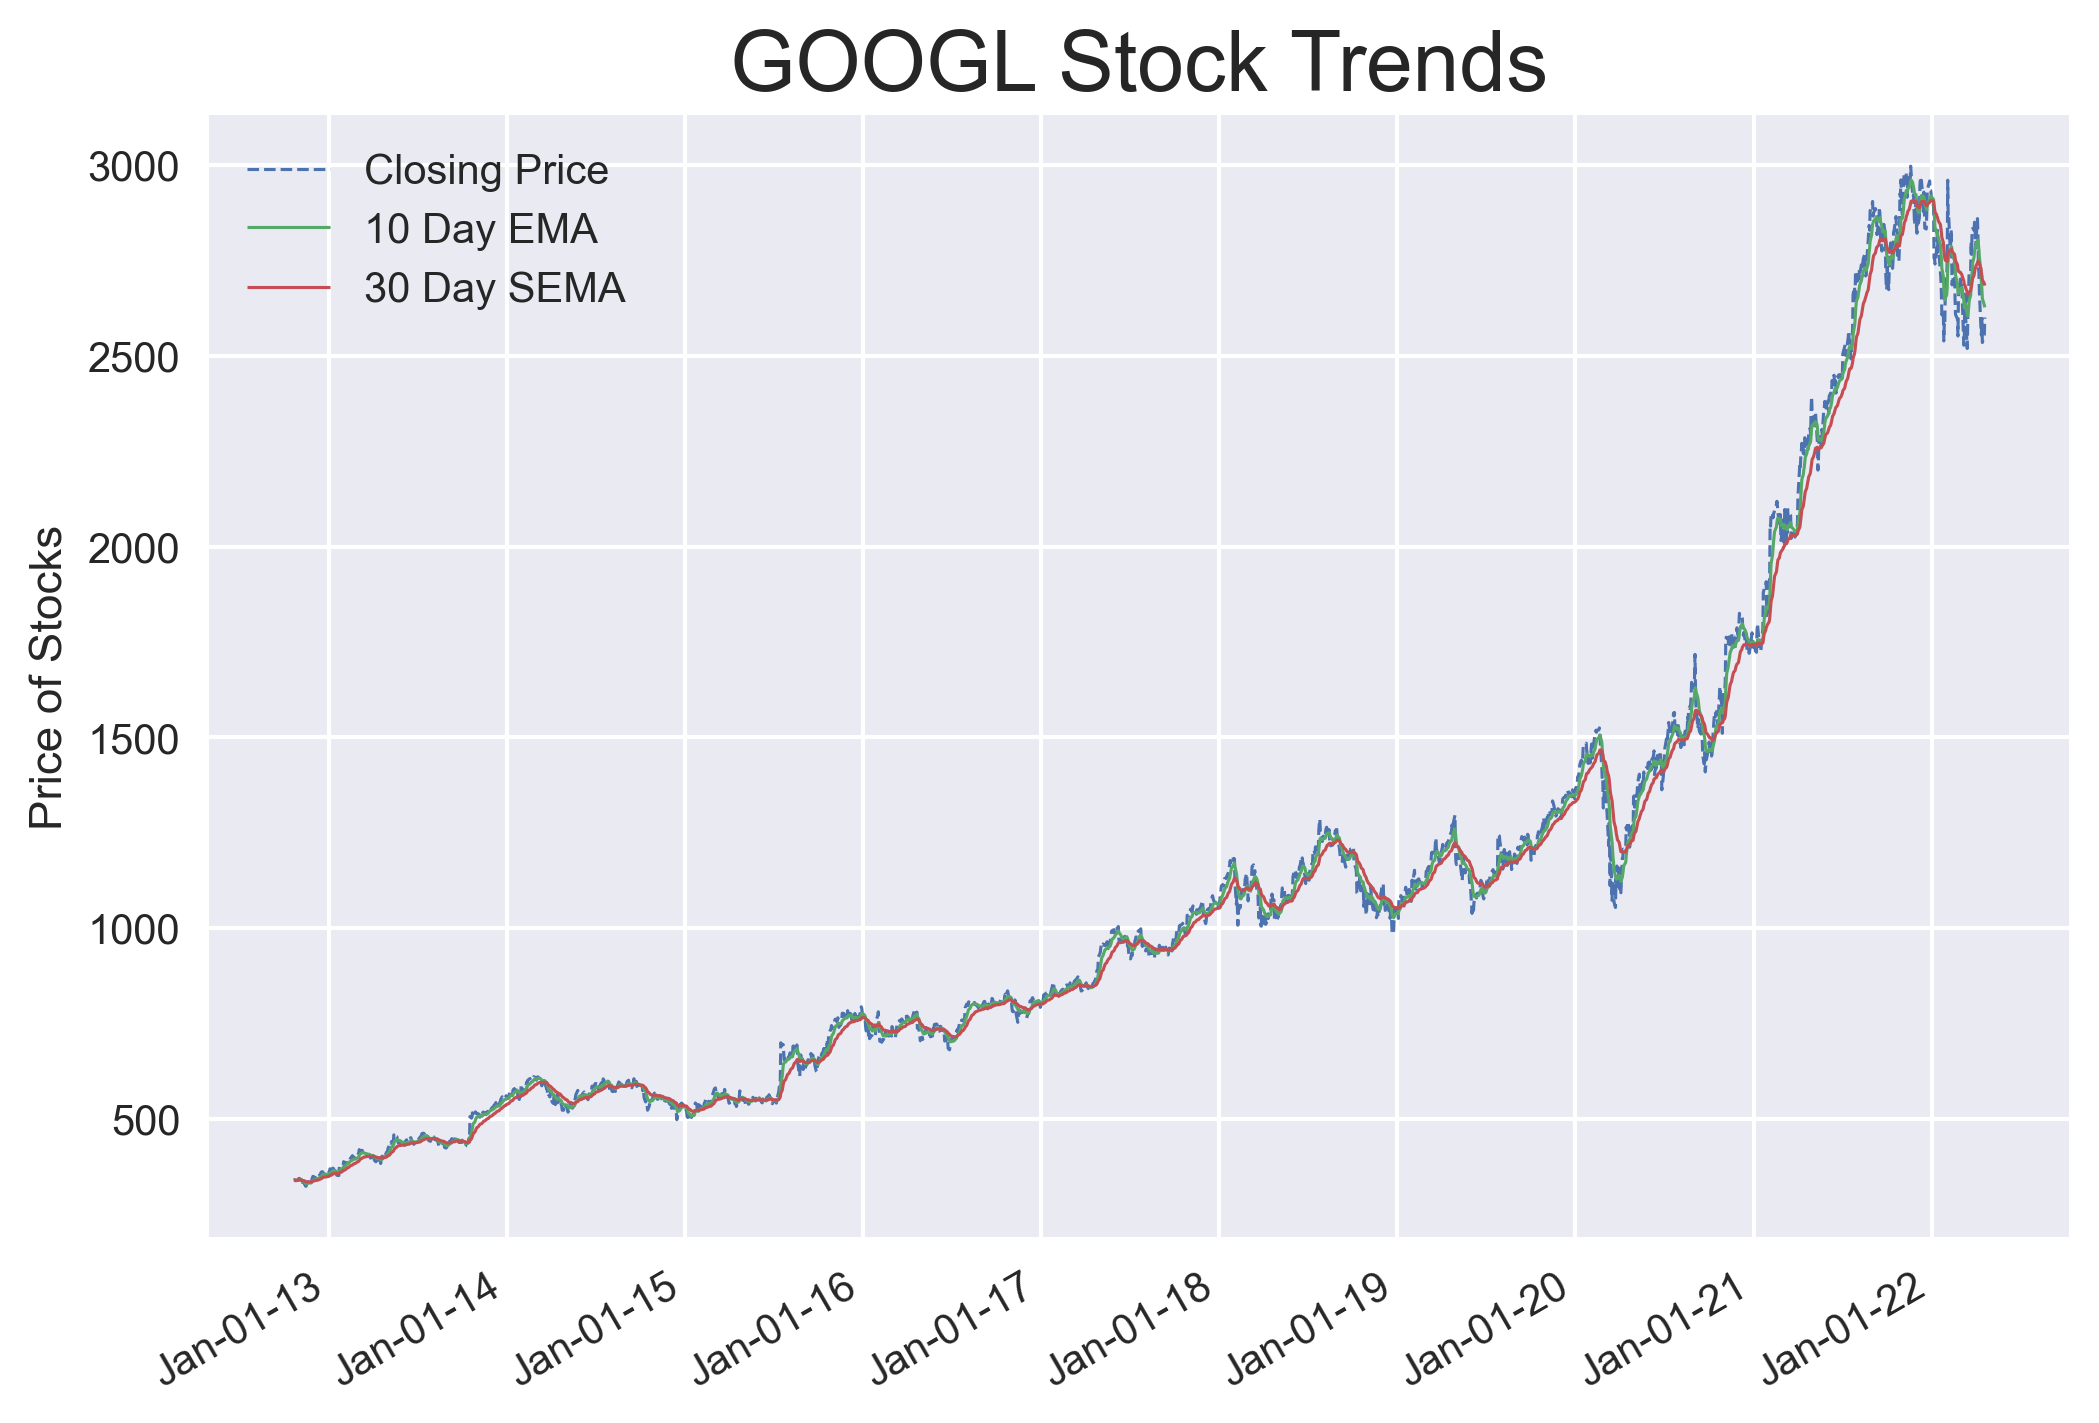

In [18]:
fig, ax = plt.subplots(dpi=300)
plt.style.use("fivethirtyeight")

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

ax.plot(stock_df['Adj Close'], lw=0.75,ls='--', label='Closing Price') 


ax.plot(ema_df['EMA_10'], lw=0.75,label='10 Day EMA')
ax.plot(ema_df['EMA_30'], lw=0.75,label='30 Day SEMA')



# Adding labels and title to the plot
ax.set_ylabel('Price of Stocks')
ax.set_title(stock_name + ' Stock Trends')
 
ax.legend()

plt.show()

In [19]:
#Creating a new dataframe
ema_trade_signals = pd.DataFrame(index=ema_df.index)

ema_trade_signals['Short'] = ema_df["EMA_10"]
ema_trade_signals['Long'] = ema_df["EMA_30"]

# Create a new column populated with zero's
ema_trade_signals['Signal'] = 0.0

# Wherever the Shorter term EMA is above the Longer term EMA, set the Signal column to 1, otherwise 0
ema_trade_signals['Signal'] = np.where(ema_trade_signals['Short'] > ema_trade_signals['Long'], 1.0, 0.0)   

ema_trade_signals

,Short,Long,Signal
Date,,,
2012-10-22,339.674683,339.674683,0.0
2012-10-23,339.827559,339.728929,1.0
2012-10-24,339.675091,339.681191,0.0
2012-10-25,339.592203,339.651385,0.0
2012-10-26,339.286876,339.539225,0.0
...,...,...,...
2022-04-12,2693.223767,2718.004102,0.0
2022-04-13,2675.888515,2710.254152,0.0
2022-04-14,2650.199712,2698.921632,0.0


In [20]:
# creating a column where 1 represent to buy and -1 represent to sell
ema_trade_signals["Order"]=ema_trade_signals['Signal'].diff()
ema_trade_signals


,Short,Long,Signal,Order
Date,,,,
2012-10-22,339.674683,339.674683,0.0,NaN
2012-10-23,339.827559,339.728929,1.0,1.0
2012-10-24,339.675091,339.681191,0.0,-1.0
2012-10-25,339.592203,339.651385,0.0,0.0
2012-10-26,339.286876,339.539225,0.0,0.0
...,...,...,...,...
2022-04-12,2693.223767,2718.004102,0.0,0.0
2022-04-13,2675.888515,2710.254152,0.0,0.0
2022-04-14,2650.199712,2698.921632,0.0,0.0


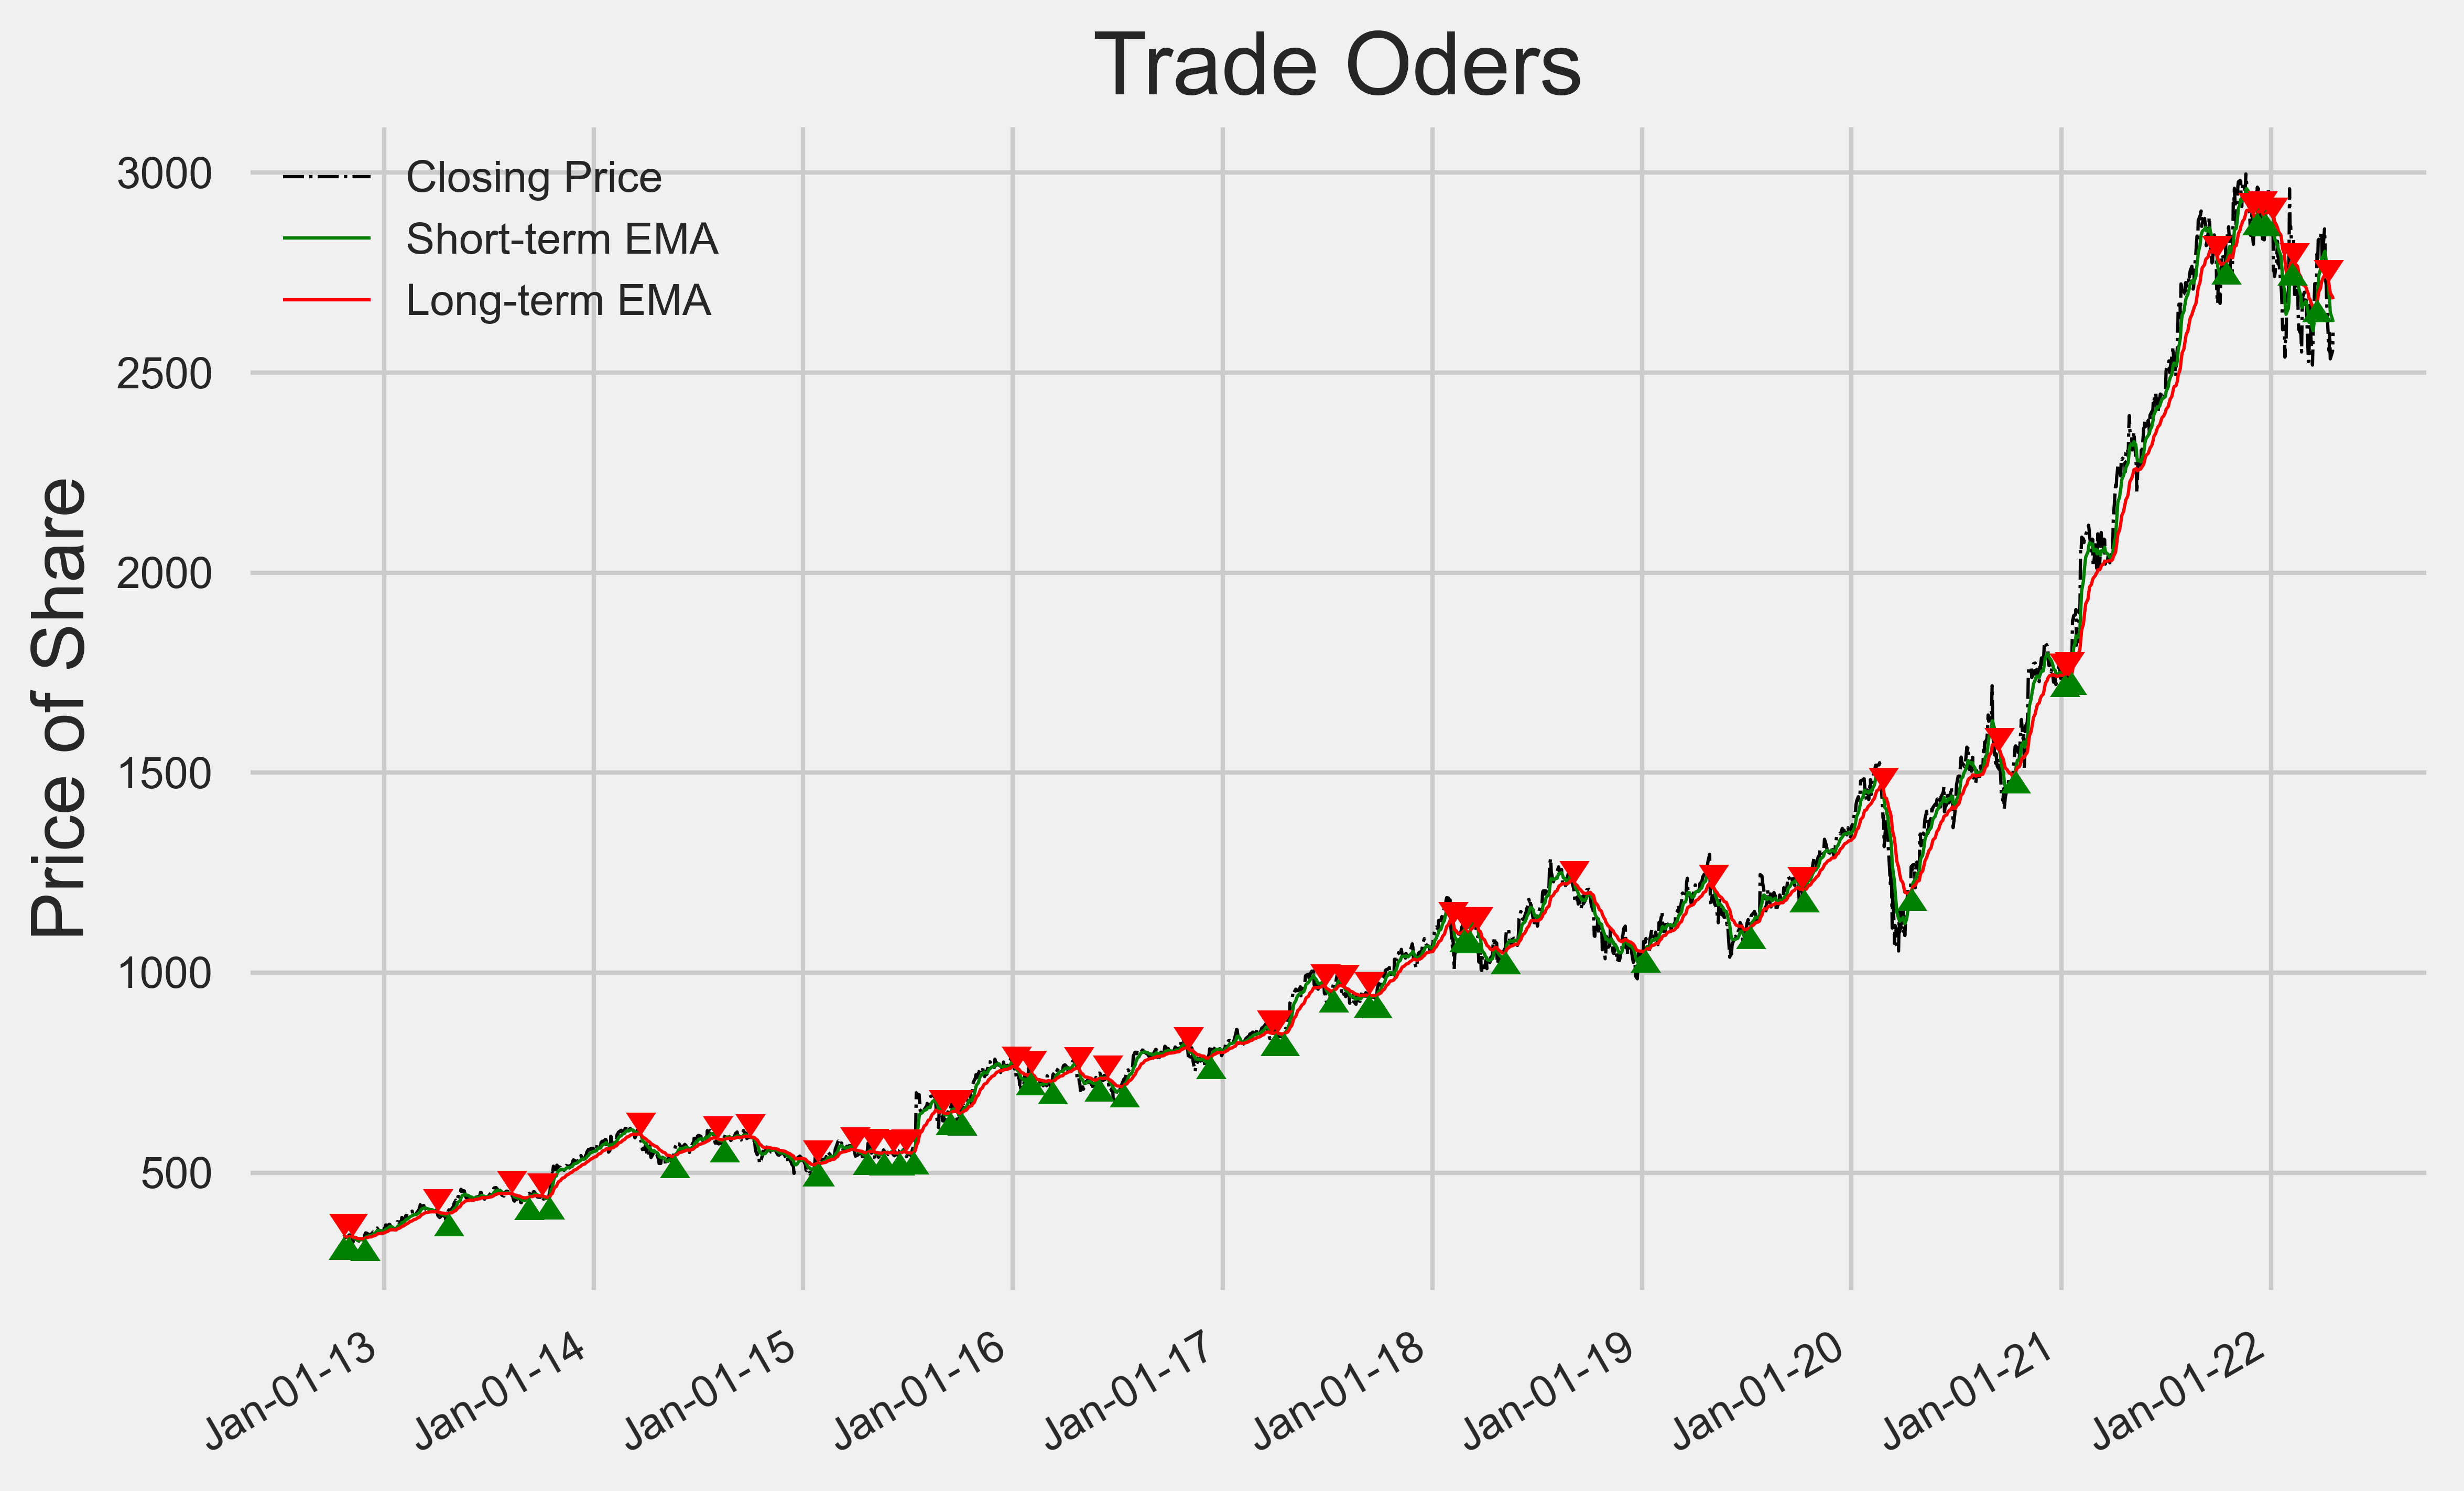

In [21]:
fig, ax = plt.subplots(dpi=600)
# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()


ax.plot(ema_df['Close'], lw=0.75,ls='-.',color='k', label='Closing Price')

# Plot the shorter-term moving average
ax.plot(ema_trade_signals['Short'], lw=0.75,color="g", label='Short-term EMA')

# Plot the longer-term moving average
ax.plot(ema_trade_signals['Long'], lw=0.75,color="r", label='Long-term EMA')


# Adding green arrows to indicate buy orders
ax.plot(ema_trade_signals.loc[ema_trade_signals['Order']==1.0].index, ema_trade_signals.Short[ema_trade_signals['Order'] == 1.0],
 marker=6, ms=7, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(ema_trade_signals.loc[ema_trade_signals['Order'] == -1.0].index, ema_trade_signals.Short[ema_trade_signals['Order'] == -1.0],
 marker=7, ms=7, linestyle='none',color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Share')
ax.set_title('Trade Oders')

ax.legend() 

plt.show()

In [22]:
#  money you will start with
ema_balance = 10000.0

# Create dataframe containing all the dates considered
ema_backtest = pd.DataFrame(index=ema_trade_signals.index)

# Adding column containing the daily percent returns
ema_backtest['stock_return'] = ema_df['Close'] / ema_df['Close'].shift(1) # Current closing price / yesterday's closing price

# Adding column containing the daily percent returns of the Moving Average Crossover strategy
ema_backtest['Alg_Return'] = np.where(ema_trade_signals.Signal == 1, ema_backtest.stock_return, 1.0)

# Adding column containing the daily value of the portfolio using the Crossover strategy
ema_backtest['Balance'] = ema_balance * ema_backtest.Alg_Return.cumprod() # cumulative product
ema_backtest

,stock_return,Alg_Return,Balance
Date,,,
2012-10-22,NaN,1.000000,10000.000000
2012-10-23,1.002475,1.002475,10024.753694
2012-10-24,0.995517,1.000000,10024.753694
2012-10-25,1.000679,1.000000,10024.753694
2012-10-26,0.996149,1.000000,10024.753694
...,...,...,...
2022-04-12,0.991391,1.000000,87348.422702
2022-04-13,1.017065,1.000000,87348.422702
2022-04-14,0.975642,1.000000,87348.422702


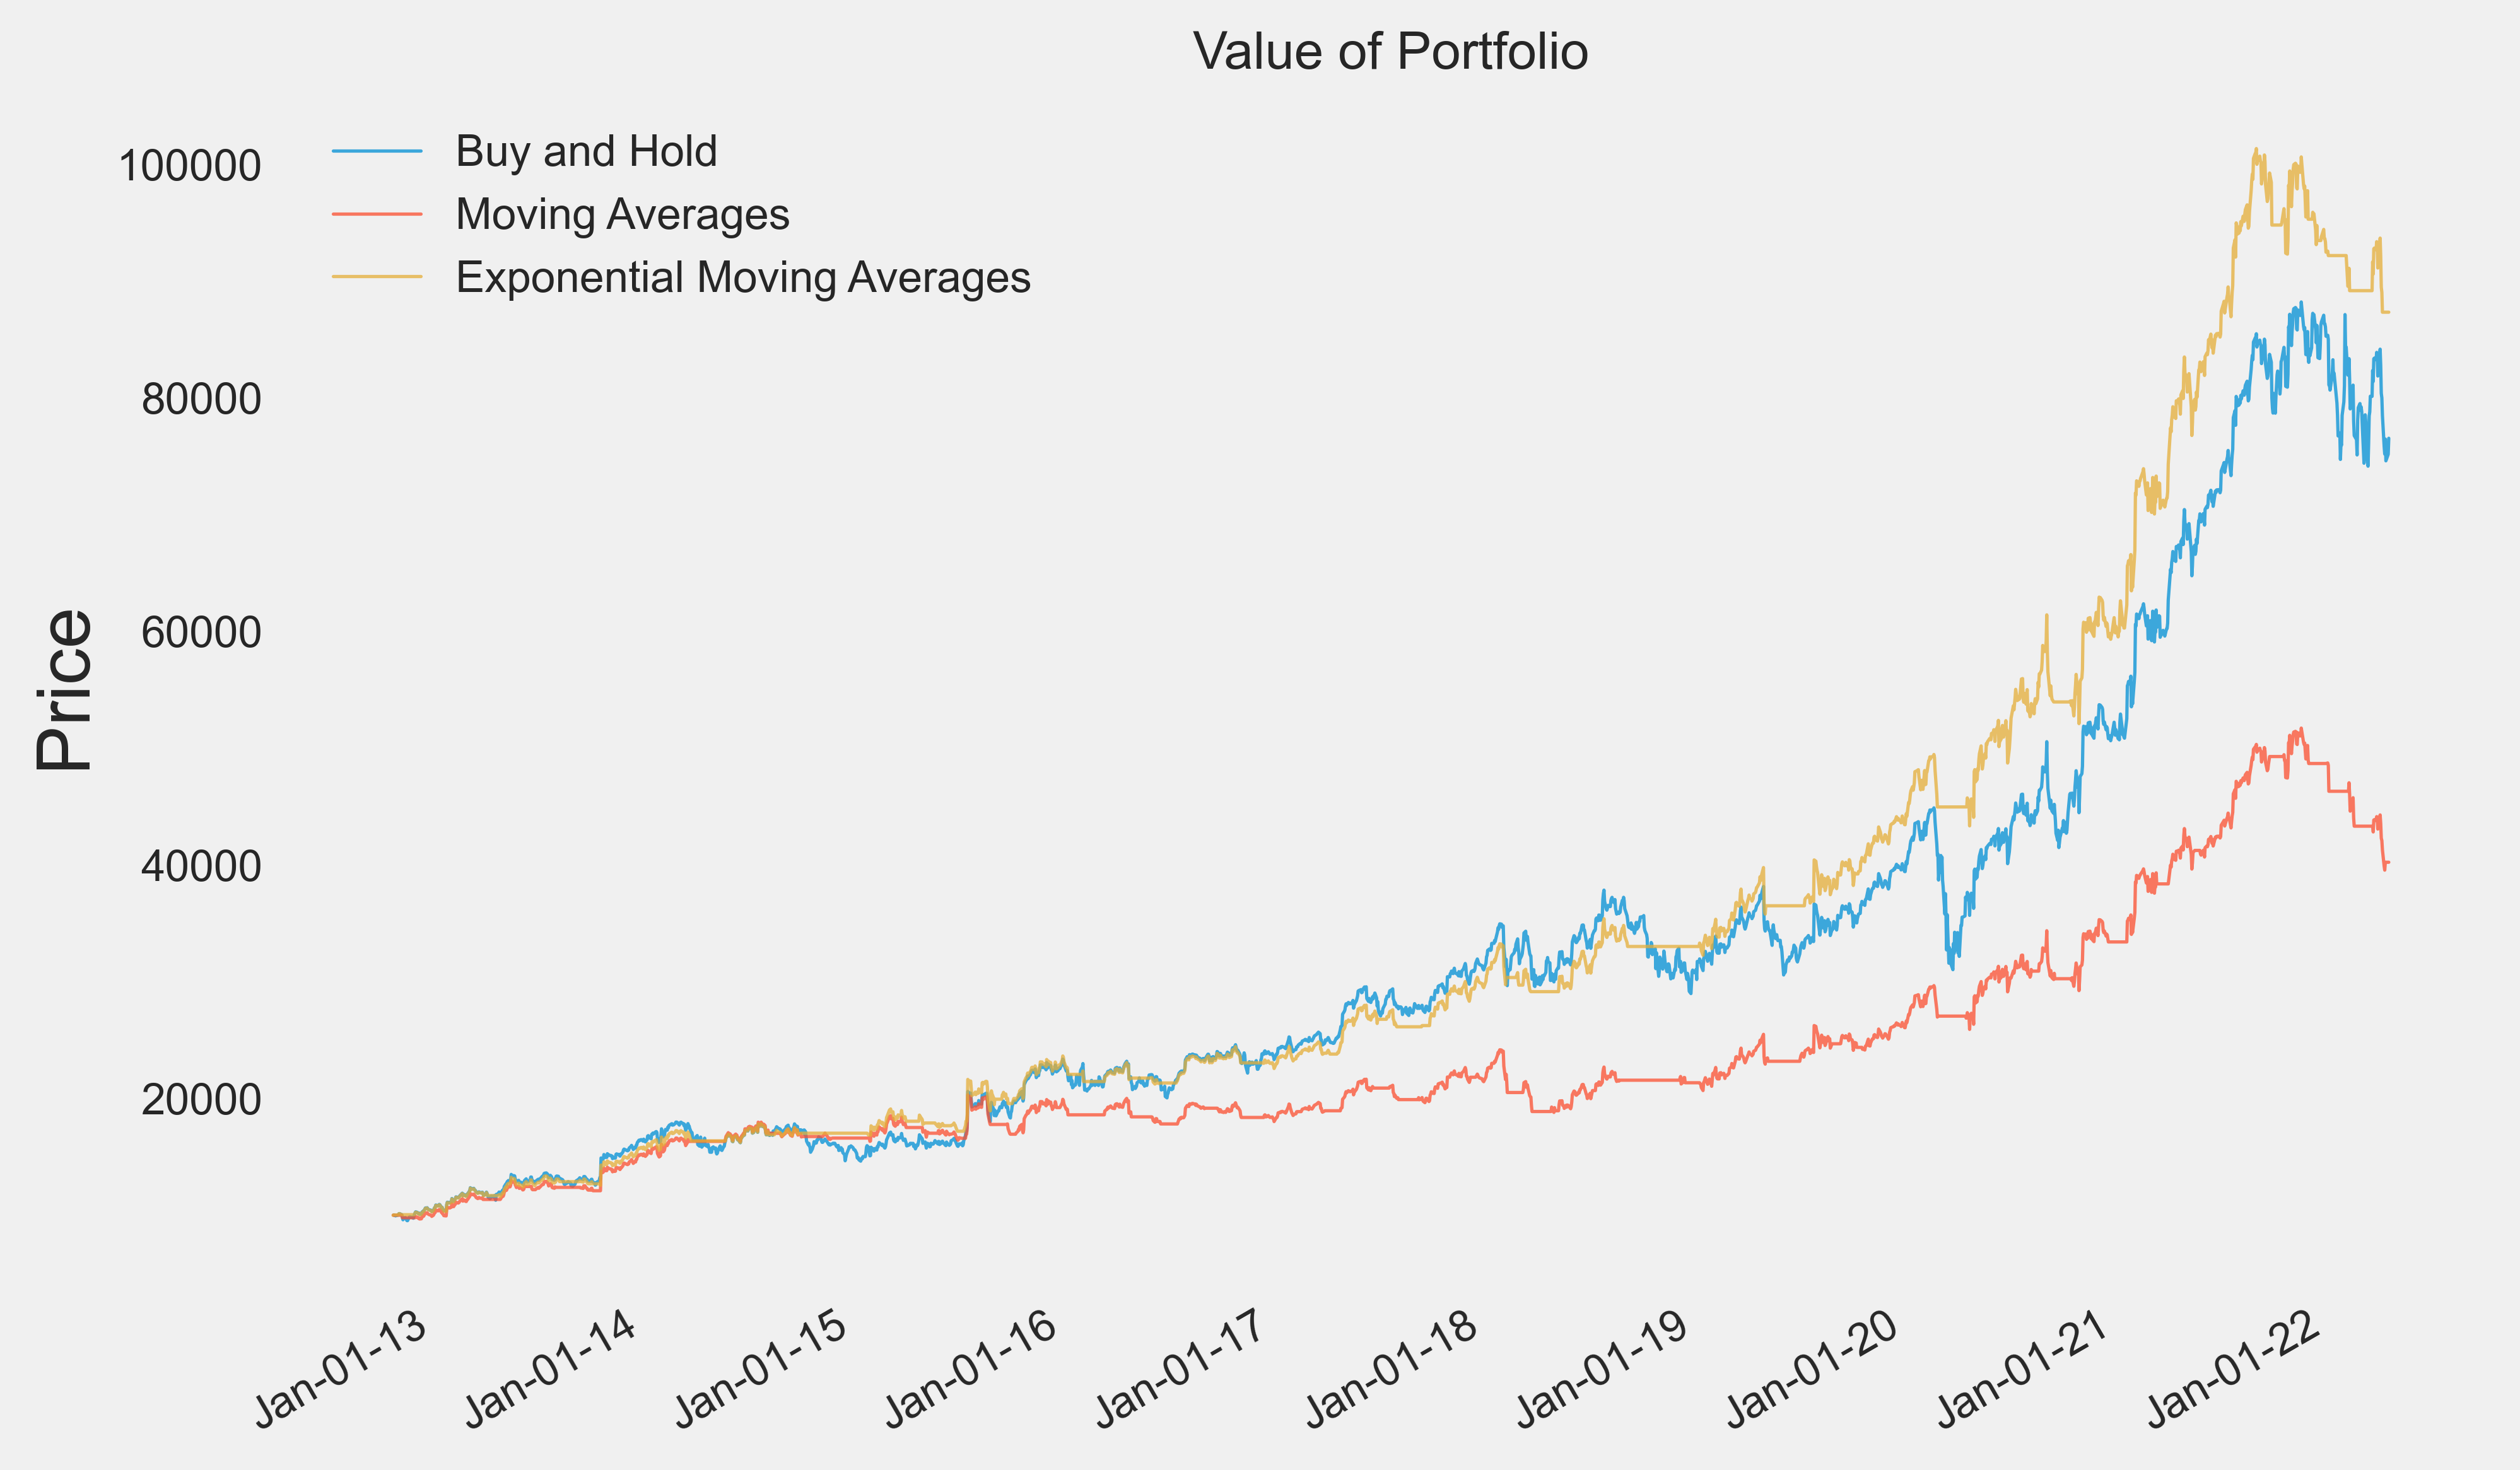

In [23]:
fig, ax = plt.subplots(dpi=500)
plt.style.use("seaborn")

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(ema_balance*ema_backtest.stock_return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Moving Averages')

# Plotting total value of Exponential Moving Averages Strategy
ax.plot(ema_backtest['Balance'], lw=0.75, alpha=0.75, label='Exponential Moving Averages')

# Adding labels and title to the plot
ax.set_ylabel('Price')
ax.set_title('Value of Portfolio')
ax.grid() 
ax.legend() 


plt.show()

In [24]:
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM


In [32]:
close = stock_df["Close"]
print(close.shape)
print(close)

(2388,)
Date
2012-10-22     339.674683
2012-10-23     340.515503
2012-10-24     338.988983
2012-10-25     339.219208
2012-10-26     337.912903
                 ...     
2022-04-12    2554.290039
2022-04-13    2597.879883
2022-04-14    2534.600098
2022-04-18    2553.530029
2022-04-19    2600.179932
Name: Close, Length: 2388, dtype: float64


In [33]:
close = close.dropna()
close.shape

(2388,)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
tmp = scaler.fit(np.array(close).reshape(-1,1))
new_df = scaler.transform(np.array(close).reshape(-1,1))

 
print(new_df)

[[0.0058966 ]
 [0.00621118]
 [0.00564006]
 ...
 [0.82708762]
 [0.8341699 ]
 [0.85162311]]


In [35]:
training_size=int(len(new_df)*0.67)
test_size=len(new_df)-training_size
train_data,test_data=new_df[0:training_size,:],new_df[training_size:len(new_df),:1]

print(train_data.shape)
print(test_data.shape)

(1599, 1)
(789, 1)


In [36]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [39]:
time_step=100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
#print(X_train, Y_train)

(1498, 100) (1498,) (688, 100) (688,)


In [40]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape, X_test.shape)
#print(X_train, Y_train)

(1498, 100, 1) (688, 100, 1)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
____________________________________________________

In [42]:
model.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
24/24 [==============================] - 23s 518ms/step - loss: 0.0056 - val_loss: 0.0130
Epoch 2/100
24/24 [==============================] - 12s 498ms/step - loss: 3.8380e-04 - val_loss: 0.0011
Epoch 3/100
24/24 [==============================] - 13s 526ms/step - loss: 2.1519e-04 - val_loss: 0.0022
Epoch 4/100
24/24 [==============================] - 11s 477ms/step - loss: 2.0871e-04 - val_loss: 0.0025
Epoch 5/100
24/24 [==============================] - 9s 399ms/step - loss: 1.8371e-04 - val_loss: 0.0032
Epoch 6/100
24/24 [==============================] - 9s 393ms/step - loss: 2.0324e-04 - val_loss: 0.0042
Epoch 7/100
24/24 [==============================] - 10s 423ms/step - loss: 1.8142e-04 - val_loss: 0.0047
Epoch 8/100
24/24 [==============================] - 12s 485ms/step - loss: 1.7248e-04 - val_loss: 0.0060
Epoch 9/100
24/24 [==============================] - 10s 399ms/step - loss: 1.8807e-04 - val_loss: 0.0052
Epoch 10/100
24/24 [==============================] 

In [43]:
model.save('lstm_spp.h5')

In [44]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
print(train_predict.shape, test_predict.shape)

(1498, 1) (688, 1)


In [45]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
print(test_predict)

[[1147.223 ]
 [1158.3475]
 [1178.3037]
 [1199.2957]
 [1215.413 ]
 [1224.2507]
 [1225.0043]
 [1215.7196]
 [1202.5963]
 [1190.6184]
 [1185.4208]
 [1184.7485]
 [1185.1687]
 [1188.0471]
 [1189.0251]
 [1188.3663]
 [1187.9474]
 [1190.5417]
 [1193.554 ]
 [1196.7726]
 [1199.6375]
 [1197.6057]
 [1193.5769]
 [1189.3376]
 [1186.2135]
 [1186.7302]
 [1189.6825]
 [1191.2655]
 [1192.2974]
 [1196.2877]
 [1201.8104]
 [1207.174 ]
 [1211.3837]
 [1215.6362]
 [1221.266 ]
 [1227.8984]
 [1233.2882]
 [1236.479 ]
 [1237.9364]
 [1238.8877]
 [1238.7036]
 [1238.2683]
 [1236.1628]
 [1236.0918]
 [1237.8188]
 [1238.7125]
 [1237.9261]
 [1234.3723]
 [1226.2468]
 [1217.1814]
 [1211.8944]
 [1210.5338]
 [1209.9849]
 [1210.7246]
 [1213.0936]
 [1216.9803]
 [1221.5284]
 [1228.394 ]
 [1236.2539]
 [1244.4669]
 [1250.6709]
 [1254.1584]
 [1254.8674]
 [1255.4668]
 [1256.6294]
 [1258.7288]
 [1264.0162]
 [1268.    ]
 [1269.7107]
 [1269.3563]
 [1269.3457]
 [1272.1027]
 [1277.0887]
 [1282.7637]
 [1289.6611]
 [1296.836 ]
 [1301.8761]

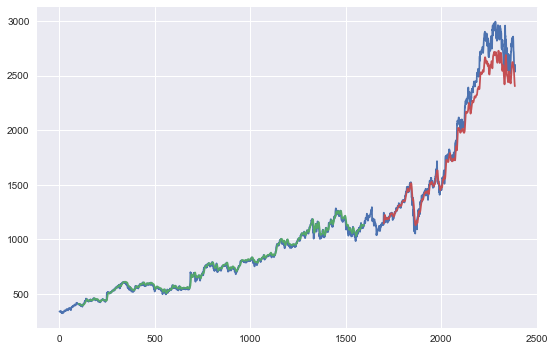

In [46]:
X = scaler.fit_transform(np.array(close).reshape(-1,1))
import matplotlib.pyplot as plt

look_back=100
trainPredictPlot = np.empty_like(X)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(X)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(X)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(X))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [48]:
rmse = np.sqrt(np.mean( test_predict - Y_test)**2)
rmse

1863.6630121846745

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence

ValueError: Length of passed values is 2388, index implies 239.

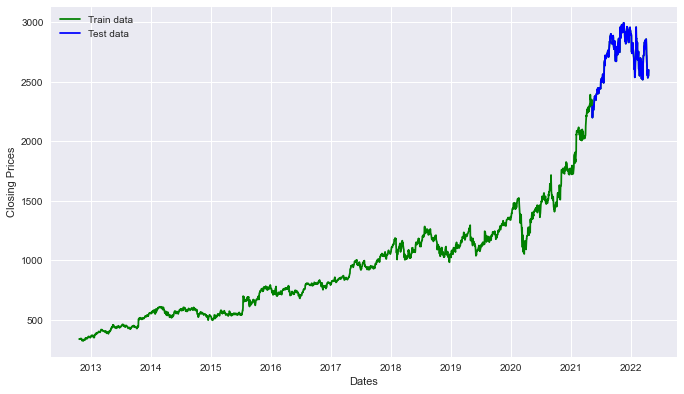

In [50]:
#Forecast
from statsmodels.tsa.arima_model import ARIMA

df_close = stock_df["Close"]

model = ARIMA(train_data, order=(5, 1, 2))
fitted = model.fit(disp=-1)


#split data into train and training set
train_data, test_data = df_close[3:int(len(df_close)*0.9)], df_close[int(len(df_close)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_close, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


fc, se, conf = fitted.forecast(len(df_close), alpha=0.05)

fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

fig, ax = plt.subplots(dpi=500)
plt.style.use("seaborn")

ax.plot(train_data, lw=0.75, alpha=0.75, label='training')

ax.plot(test_data, lw=0.75, alpha=0.75, label='testing',color = 'blue')
ax.plot(fc_series, lw=0.75, alpha=0.75, label='Predicted',color = 'orange')

plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [86]:
cols = list(stock_df)[1:]

In [68]:
df_for_training = stock_df[cols].astype(float)
df_for_training.shape

(2388, 9)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled.shape 

(2388, 9)

In [72]:
trainX = []
trainY = []

n_future = 7
n_past = 100  # Number of past days we want to use to predict the future.

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (2282, 100, 9).
trainY shape == (2282, 1).


In [73]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 64)           18944     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 31,393
Trainable params: 31,393
Non-trainable params: 0
_________________________________________________________________


In [74]:
history = model.fit(trainX, trainY, epochs=30, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/30
129/129 [==============================] - 10s 57ms/step - loss: 0.0431 - val_loss: 70.1425
Epoch 2/30
129/129 [==============================] - 7s 58ms/step - loss: 0.0196 - val_loss: 0.0990
Epoch 3/30
129/129 [==============================] - 8s 63ms/step - loss: 0.0193 - val_loss: 0.0252
Epoch 4/30
129/129 [==============================] - 9s 69ms/step - loss: 0.0179 - val_loss: 0.0594
Epoch 5/30
129/129 [==============================] - 8s 65ms/step - loss: 0.0172 - val_loss: 0.0241 - ETA: 1s - loss: 0.0
Epoch 6/30
129/129 [==============================] - 9s 66ms/step - loss: 0.0165 - val_loss: 0.0544
Epoch 7/30
129/129 [==============================] - 8s 64ms/step - loss: 0.0154 - val_loss: 0.2045
Epoch 8/30
129/129 [==============================] - 8s 64ms/step - loss: 0.0145 - val_loss: 0.5574
Epoch 9/30
129/129 [==============================] - 8s 63ms/step - loss: nan - val_loss: nan
Epoch 10/30
129/129 [==============================] - 8s 64ms/step - los

In [75]:
model.save('lstm_mv.h5')

In [94]:
tock_df=stock_df.copy()
tock_df.reset_index(inplace=True)
tock_df

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,EMA_10,EMA_30
0,2012-10-22,340.845856,342.657654,335.185181,339.674683,339.674683,8103089,339.674683,339.674683,339.674683,339.674683
1,2012-10-23,336.341339,344.009003,336.336334,340.515503,340.515503,5827367,340.095093,340.095093,339.827559,339.728929
2,2012-10-24,343.743744,343.843842,337.972961,338.988983,338.988983,4988007,339.726390,339.726390,339.675091,339.681191
3,2012-10-25,340.340332,341.341339,337.092102,339.219208,339.219208,4797398,339.599594,339.599594,339.592203,339.651385
4,2012-10-26,338.588593,341.856842,335.935944,337.912903,337.912903,3897698,339.262256,339.262256,339.286876,339.539225
...,...,...,...,...,...,...,...,...,...,...,...
2383,2022-04-12,2632.000000,2632.000000,2535.780029,2554.290039,2554.290039,1635500,2733.962012,2704.271012,2693.223767,2718.004102
2384,2022-04-13,2560.000000,2606.679932,2554.820068,2597.879883,2597.879883,1396400,2709.872998,2701.152677,2675.888515,2710.254152
2385,2022-04-14,2609.590088,2609.590088,2532.020020,2534.600098,2534.600098,1576500,2685.197998,2696.373014,2650.199712,2698.921632
2386,2022-04-18,2540.000000,2564.250000,2523.639893,2553.530029,2553.530029,1040400,2660.250000,2693.553019,2632.623406,2689.541529


In [98]:
from datetime import datetime
#Separate dates for future plotting
train_dates = pd.to_datetime(tock_df['Date'])
print(train_dates.tail(15)) #Check last few dates. 

2373   2022-03-29
2374   2022-03-30
2375   2022-03-31
2376   2022-04-01
2377   2022-04-04
2378   2022-04-05
2379   2022-04-06
2380   2022-04-07
2381   2022-04-08
2382   2022-04-11
2383   2022-04-12
2384   2022-04-13
2385   2022-04-14
2386   2022-04-18
2387   2022-04-19
Name: Date, dtype: datetime64[ns]


In [99]:
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

[Timestamp('2022-03-28 00:00:00', freq='C'), Timestamp('2022-03-29 00:00:00', freq='C'), Timestamp('2022-03-30 00:00:00', freq='C'), Timestamp('2022-03-31 00:00:00', freq='C'), Timestamp('2022-04-01 00:00:00', freq='C'), Timestamp('2022-04-04 00:00:00', freq='C'), Timestamp('2022-04-05 00:00:00', freq='C'), Timestamp('2022-04-06 00:00:00', freq='C'), Timestamp('2022-04-07 00:00:00', freq='C'), Timestamp('2022-04-08 00:00:00', freq='C'), Timestamp('2022-04-11 00:00:00', freq='C'), Timestamp('2022-04-12 00:00:00', freq='C'), Timestamp('2022-04-13 00:00:00', freq='C'), Timestamp('2022-04-14 00:00:00', freq='C'), Timestamp('2022-04-15 00:00:00', freq='C')]


<ipython-input-102-eb241f4846c7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.war

<AxesSubplot:xlabel='Date', ylabel='Open'>

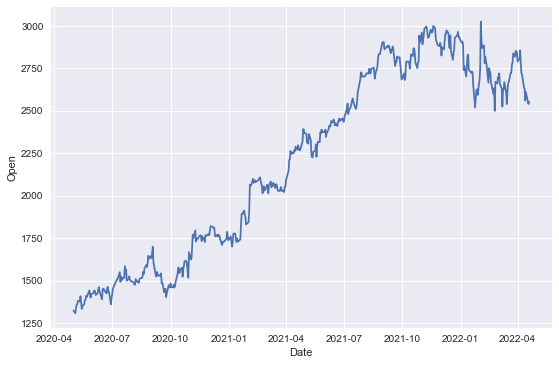

In [102]:
import seaborn as sns

# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Open':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])


original = tock_df[['Date', 'Open']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-5-1']

sns.lineplot(original['Date'], original['Open'])
sns.lineplot(df_forecast['Date'], df_forecast['Open'])